# Single NV Scanning Microscope Control

This notebook provides an interactive interface to control the scanning microscope experiments. You can configure scan parameters, run scans in real-time or buffered mode, and visualize the results.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import ipywidgets as widgets
from main import ScanningMicroscope
import json
import time

# Set up matplotlib for inline plotting
%matplotlib inline

## Initialize Microscope

In [2]:
# Initialize the microscope
microscope = ScanningMicroscope()
print("Microscope initialized successfully!")

Successfully initialized DAQ connection
Microscope initialized successfully!


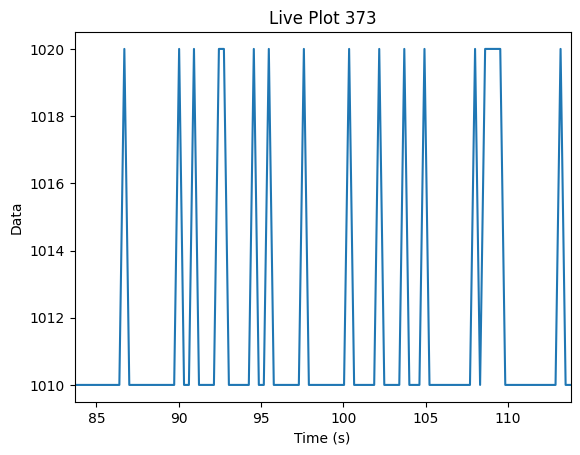

In [3]:
import live_plot

def measure_photons():
    try:
        # Read photon counts for 0.1 seconds
        counts = microscope.controller.read_spd_count(sampling_time=0.1)
        # Convert to counts per second
        return counts * 10  # Multiply by 10 since we sampled for 0.1s
    except Exception as e:
        print(f"Error reading photon counts: {str(e)}")
        return 0

def start_photon_plotting(b):
    try:
        print("Starting live photon counting plot. Press Ctrl+C to stop.")
        live_plot.live_plot(
            measure_function=measure_photons,
            histogram_range=100,  # Show last 100 points
            dt=0.1  # Update every 0.1 seconds
        )
    except KeyboardInterrupt:
        print("\nPlotting stopped by user")
    except Exception as e:
        print(f"\nError during plotting: {str(e)}")

photon_plot_button = widgets.Button(description='Start Photon Counting Plot')
photon_plot_button.on_click(start_photon_plotting)
display(photon_plot_button)

## Configure Scan Parameters

In [3]:
# Create widgets for scan configuration
x_range = widgets.FloatRangeSlider(
    value=[-1.0, 1.0],
    min=-2.0,
    max=2.0,
    step=0.1,
    description='X Range:',
    continuous_update=False
)

y_range = widgets.FloatRangeSlider(
    value=[-1.0, 1.0],
    min=-2.0,
    max=2.0,
    step=0.1,
    description='Y Range:',
    continuous_update=False
)

x_res = widgets.IntSlider(
    value=10,
    min=5,
    max=100,
    step=1,
    description='X Resolution:',
    continuous_update=False
)

y_res = widgets.IntSlider(
    value=10,
    min=5,
    max=100,
    step=1,
    description='Y Resolution:',
    continuous_update=False
)

dwell_time = widgets.FloatSlider(
    value=0.01,
    min=0.001,
    max=1.0,
    step=0.001,
    description='Dwell Time (s):',
    continuous_update=False
)

scan_mode = widgets.RadioButtons(
    options=['realtime', 'buffered'],
    description='Scan Mode:',
    disabled=False
)

def update_config(b):
    microscope.config['scan_range']['x'] = list(x_range.value)
    microscope.config['scan_range']['y'] = list(y_range.value)
    microscope.config['resolution']['x'] = x_res.value
    microscope.config['resolution']['y'] = y_res.value
    microscope.config['dwell_time'] = dwell_time.value
    microscope.config['scan_mode'] = scan_mode.value
    print("Configuration updated!")

update_button = widgets.Button(description='Update Configuration')
update_button.on_click(update_config)

# Display widgets
widgets.VBox([x_range, y_range, x_res, y_res, dwell_time, scan_mode, update_button])

Configuration updated!


## Run Scan

Button(description='Start Scan', style=ButtonStyle())

Starting continuous scanning. Press Ctrl+C to stop.


h:\Mi unidad\Burkelab\Code\Single_NV_Scannig_Microscopy\scan_visualizer.py:90: UserWarning: frames=<generator object ScanningMicroscope._run_realtime_scan.<locals>.data_generator at 0x000002B70D7E9D50> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  self.animation = FuncAnimation(


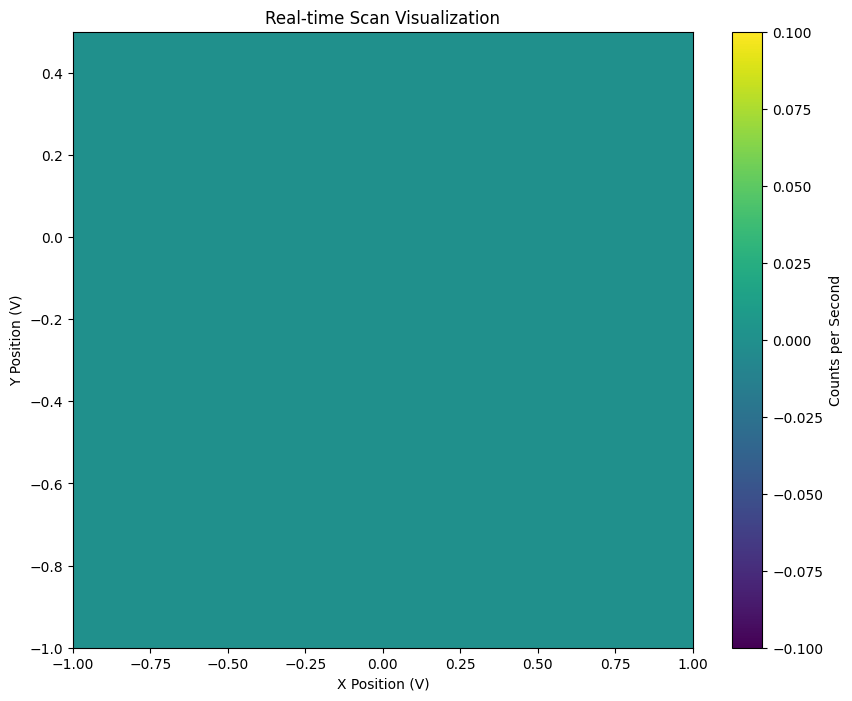

In [5]:
def run_scan(b):
    try:
        microscope.setup_scan()
        microscope.run_scan()
    except Exception as e:
        print(f"Error during scan: {str(e)}")

scan_button = widgets.Button(description='Start Scan')
scan_button.on_click(run_scan)
display(scan_button)

## Save Configuration

In [ ]:
def save_config(b):
    filename = f"scan_config_{time.strftime('%Y%m%d_%H%M%S')}.json"
    microscope.save_config(filename)
    print(f"Configuration saved to {filename}")

save_button = widgets.Button(description='Save Configuration')
save_button.on_click(save_config)
display(save_button)

## Cleanup

In [ ]:
def cleanup(b):
    microscope.close()
    print("Microscope closed successfully")

cleanup_button = widgets.Button(description='Close Microscope')
cleanup_button.on_click(cleanup)
display(cleanup_button)